In [0]:
import numpy as np
import matplotlib.pyplot as plt
import operator

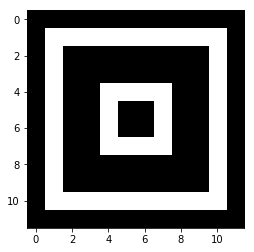

In [2]:
image = [
    
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 255, 255, 255, 255, 0, 0, 255, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 255, 0, 0, 255, 255, 255, 255, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

]

img = np.array(image)
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()

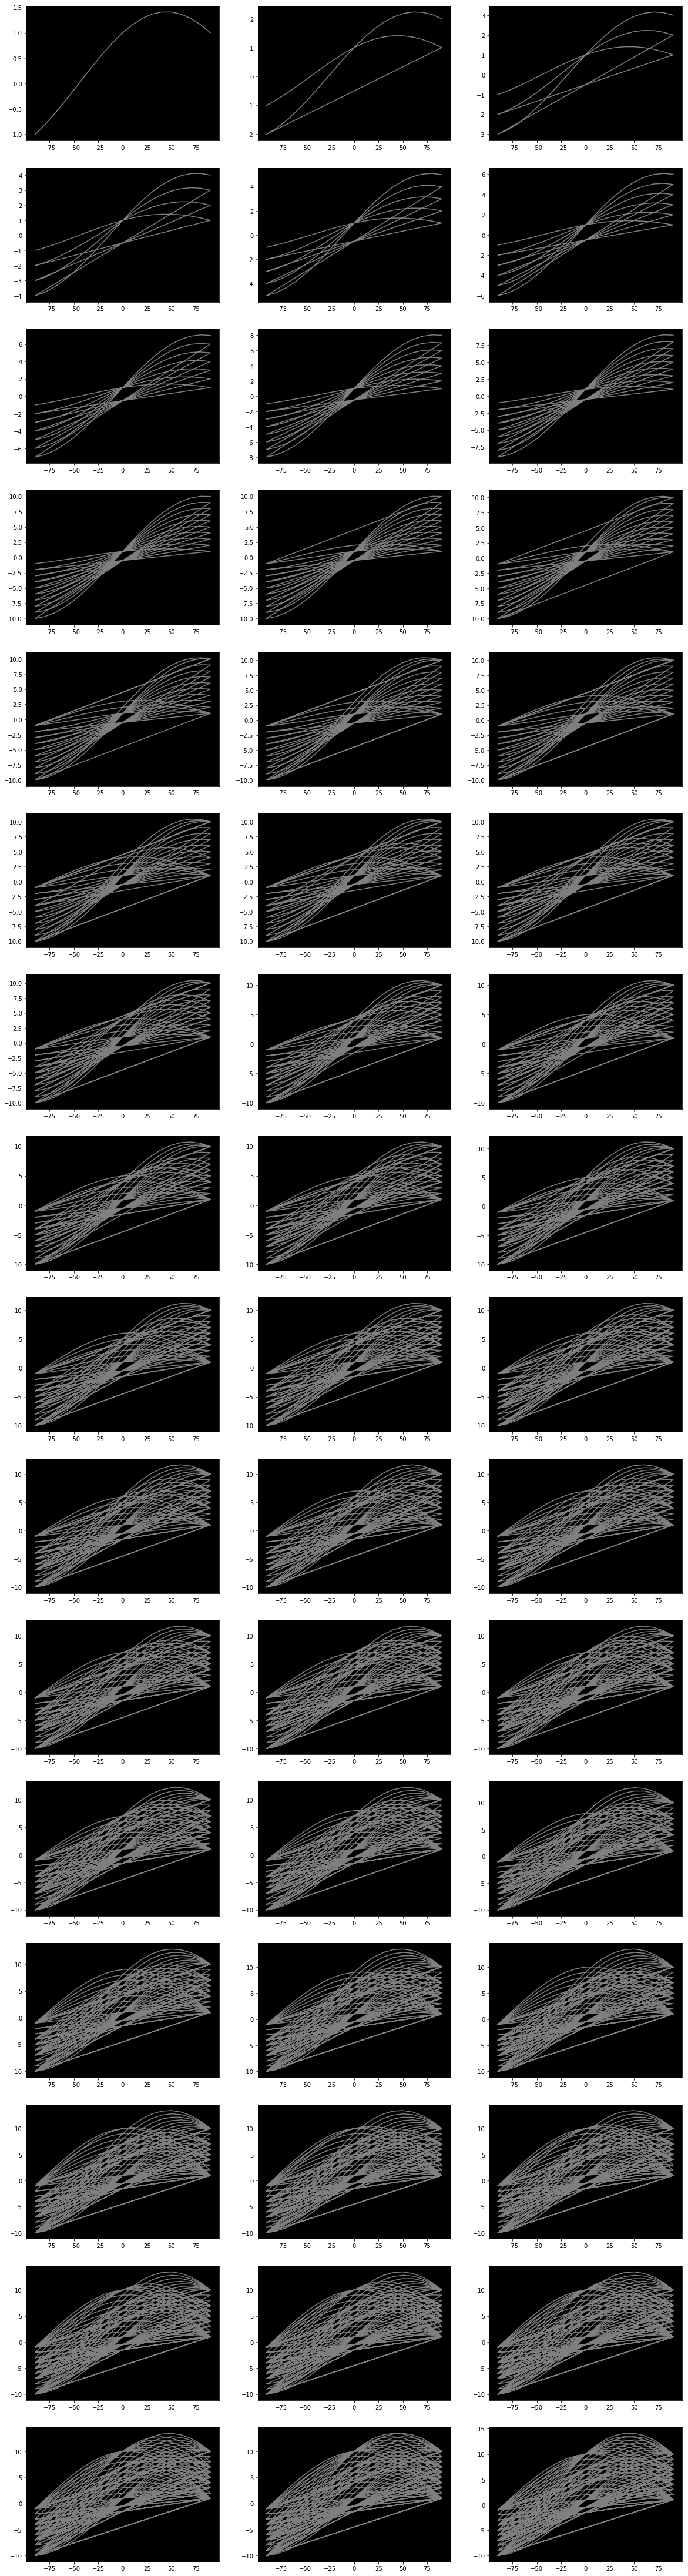

In [7]:
fig = plt.figure()
fig.set_figheight(80)
fig.set_figwidth(20)


cnt = 0
accumulator = {}
temp_x = []
temp_y = []

for x in range(len(image)):
    for y in range(len(image[0])):
        
        if image[x][y] == 255:
            
            cnt += 1
        
            for theta in range(-90,100,10):
                rho = x*np.cos(np.deg2rad(theta)) + y*np.sin(np.deg2rad(theta))

                temp_x.append(theta)
                temp_y.append(rho)
                
                if (theta, rho) in accumulator.keys():
                    accumulator[(theta, rho)] += 1
                else: accumulator[(theta, rho)] = 1
                    
            plt.subplot(16,3,cnt)
            plt.plot(temp_x,temp_y, alpha=0.5, color='white')            
            ax = plt.gca()
            ax.set_facecolor('black')
            
plt.show()      

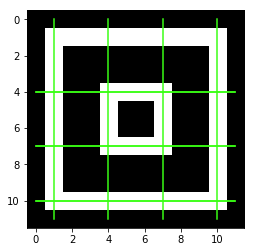

In [4]:
sorted_accumulator = sorted(accumulator.items(), key=operator.itemgetter(1), reverse=True)

for cell in sorted_accumulator:
    
    votes = cell[1]
    
    if votes > 4:
        
        rho = cell[0][1]
        theta = cell[0][0]
        
        if round(np.sin(np.deg2rad(theta))) == 0:
            x = [rho/round(np.cos(np.deg2rad(theta))) for _ in range(12)]
            y = [_ for _ in range(0, 12)]
            
        elif round(np.cos(np.deg2rad(theta))) == 0:
            x = [_ for _ in range(0, 12)]
            y = [rho/round(np.sin(np.deg2rad(theta))) for _ in range(12)]
        
        else:
            x = np.linspace(0,12,1)
            y = (rho - x*np.cos(np.deg2rad(theta)))/np.sin(np.deg2rad(theta))
    
        plt.plot(x, y, color=(57/255, 255/255, 20/255))
        ax = plt.gca()
        ax.set_facecolor('black')    
        
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.show()